# Analysis of Biodiversity in US National Parks
With data from X parks, an analysis will be made to determine if there are trends in the number of observations, the conservations status, etc.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

## Inspection of the data
The csv file `species_info.csv` contains data about different species and their conservation status. The columns in it are as follows:

* `category`: The category of the animal (Mammal, Bird, Reptile, etc.).
* `scientific_name`: The scientific name.
* `common_names`: The common name.
* `conservation_status`: The conservation status ('Species of Concern', 'Endangered', 'Threatened', 'In Recovery', or NaN)

In [2]:
species = pd.read_csv('species_info.csv').drop_duplicates(subset = ['scientific_name'])
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The csv file `observations.csv` holds recorded sightings of different species at several national parks for the past 7 days. The columns in it are the following:

* `scientific_name`: The scientific name of the individual seen.
* `park_name`: The park where it has been spotted.
* `observations`: The number of observations.

In [3]:
observations = pd.read_csv('observations.csv').drop_duplicates()
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Analysis

In the following section, the following questions will be adressed:

* What is the proportion of endangered species for each category?
* Are different categories of animals more likely than others to be endangered?
* Are some categories of animals morel likely to be observed in parks than others?
* The observations of flora and fauna varies significantly across different parks?
* Are endangered species spotted in parks differently? What about the other conservation statuses?

### What is the proportion of endangered species for each category?

We will analyze the proportion of endangered species for each category.

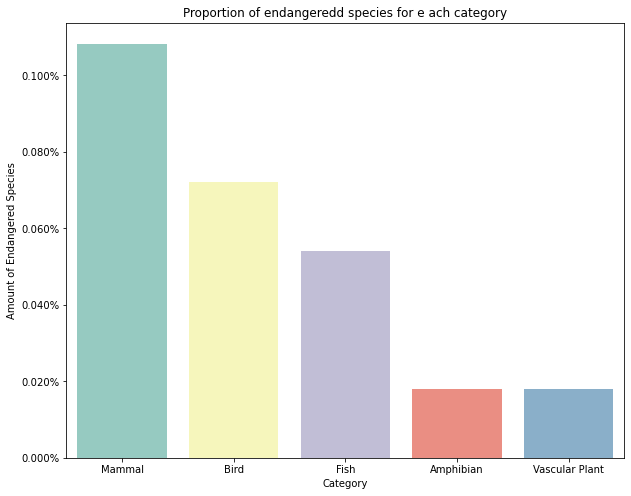

In [4]:
category_totals = species[species.conservation_status == 'Endangered'].groupby('category').conservation_status.count().reset_index()
category_totals['percent'] = 100 * category_totals.conservation_status / len(species)

category_totals.sort_values(by=['percent'], ascending = False, inplace = True)

plt.figure(figsize=(10,8))
sns.set_palette('Set3')
ax = sns.barplot(data = category_totals, x = 'category', y = 'percent')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Proportion of endangeredd species for e ach category')
plt.xlabel('Category')
plt.ylabel('Amount of Endangered Species')
plt.show()

From the previous graph we can see that mammals have, in proportion, more endangered species followed by birds and fishes.

### Are different categories of animals more likely than others to be endangered?

In the following plot we can see all animal categories separated by they conservation status

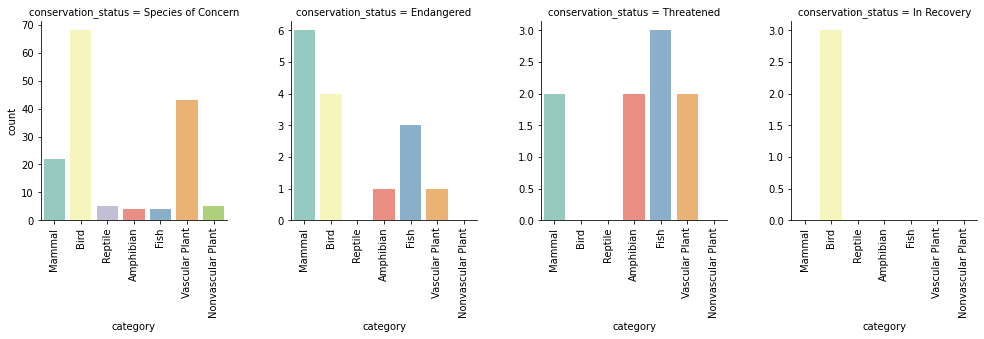

In [5]:
g = sns.catplot(x="category", col="conservation_status", col_wrap=4, data = species, kind="count", height=3.5, aspect=1.0, sharey = None)
g.set_xticklabels(rotation=90)
plt.show()

With our data, we can conclude that mammals have the greatest amount of species endangered, followed by birds and fish.

However, fishes have the most threatened species followed closely by mammals, amphibians and vascular plants.

Birds have nearly 70 species of concern and 3 in recovery.

### Are some categories of animals morel likely to be observed in parks than others?

In the following plot we can see the distribution of observations for each category across all parks.

In [6]:
observations_with_cat = pd.merge(observations,species,on='scientific_name',how='left')

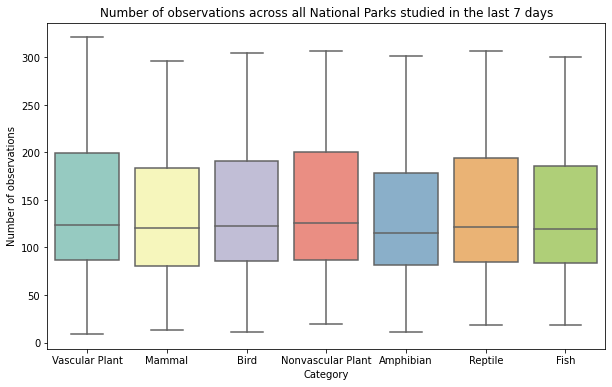

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(data = observations_with_cat, x = 'category', y = 'observations')
plt.xlabel('Category')
plt.ylabel('Number of observations')
plt.title('Number of observations across all National Parks studied in the last 7 days')
plt.show()

To check if there is a statistically significant difference between the categories we will do an ANOVA test with the following hypotesis:

* H0: The population means are all equal.
* Ha: At least one pair has different population means.

The significance level chosen is 0.05.

In [8]:
from scipy.stats import f_oneway

vascular_plant = observations_with_cat[observations_with_cat['category'] == 'Vascular Plant'].observations
mammal = observations_with_cat[observations_with_cat['category'] == 'Vascular Plant'].observations
bird = observations_with_cat[observations_with_cat['category'] == 'Bird'].observations
nonvascular_plant = observations_with_cat[observations_with_cat['category'] == 'Nonvascular Plant'].observations
amphibian = observations_with_cat[observations_with_cat['category'] == 'Amphibian'].observations
reptile = observations_with_cat[observations_with_cat['category'] == 'Reptile'].observations
fish = observations_with_cat[observations_with_cat['category'] == 'Fish'].observations

F, pval = f_oneway(vascular_plant, mammal, bird, nonvascular_plant, amphibian, reptile, fish)

print('The p-value for the ANOVA test is: {:.2f}'.format(pval))

The p-value for the ANOVA test is: 0.47


Since the p-value is greater than the significance level, we can conclude that there are not significant differences in the means of the number of observations between different categories of flora and fauna.

### The observations of flora and fauna varies significantly across different parks?

In the following plot we can see the distribution of all observations for each park.

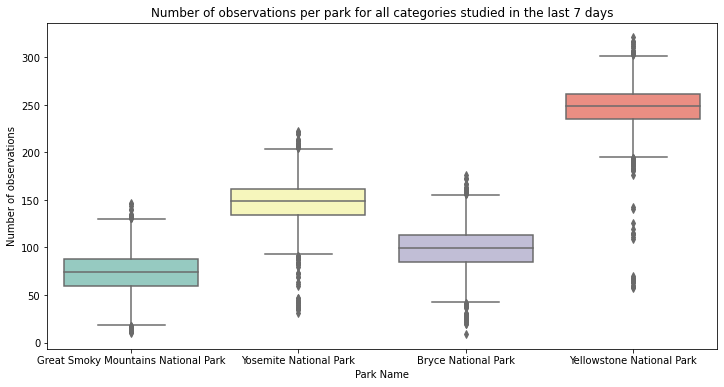

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data = observations_with_cat, x = 'park_name', y = 'observations')
plt.xlabel('Park Name')
plt.ylabel('Number of observations')
plt.title('Number of observations per park for all categories studied in the last 7 days')
plt.show()

Now, to see if the differences seen in the previous graph are statistically significant, we will run an ANOVA test with a significance level of 0.05.

In [10]:
great_smoky_mntns = observations_with_cat[observations_with_cat['park_name'] == 'Great Smoky Mountains National Park'].observations
yosemite = observations_with_cat[observations_with_cat['park_name'] == 'Yosemite National Park'].observations
bryce = observations_with_cat[observations_with_cat['park_name'] == 'Bryce National Park'].observations
yellowstone = observations_with_cat[observations_with_cat['park_name'] == 'Yellowstone National Park'].observations

F, pval = f_oneway(great_smoky_mntns, yosemite, bryce, yellowstone)

print('The p-value for the ANOVA test is: {:.2f}'.format(pval))

The p-value for the ANOVA test is: 0.00


Since the p-value is lower than the significance level, we can conclude that **there are** significant differences in the means of the number of observations between different parks.

With a Tukey's Range Test we can determine *which* pairs are significantly different from one another.

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(observations_with_cat['observations'],observations_with_cat['park_name']))

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                              group2               meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------------------
                Bryce National Park Great Smoky Mountains National Park -24.7557 0.001  -25.7747 -23.7366   True
                Bryce National Park           Yellowstone National Park 148.9618 0.001  147.9427 149.9808   True
                Bryce National Park              Yosemite National Park  49.3271 0.001   48.3081   50.346   True
Great Smoky Mountains National Park           Yellowstone National Park 173.7175 0.001  172.6982 174.7367   True
Great Smoky Mountains National Park              Yosemite National Park  74.0827 0.001   73.0636  75.1019   True
          Yellowstone National Park              Yosemite National Park -99.6347 0.001 -100.6538

We can see that for a significance level of 0.05, there are significant differences between the number of observations across **all** parks.

### Are endangered species spotted in parks differently? What about the other conservation statuses?
Similarly as a previous question, we will analyze in depth the observations of different conservation status for each category in each park

To analyze if the observed statuses are as expected or if there are more obervations of a certain conservation status than there should be we will run a Pearson $\chi^2$ Test with the following hypotesis:

* H0: The frequency distribution of the events observed in a sample is consistent with a particular theoretical distribution.
* Ha: The frequency distribution of the events observed in a sample is not consistent with a particular theoretical distribution.

We will use a significance level of 0.05

In [12]:
from scipy.stats import chi2_contingency
cross_table = pd.crosstab(index = observations_with_cat.park_name, columns = observations_with_cat.conservation_status, values = observations_with_cat.observations, aggfunc = np.sum)
chi2, pval, dof, exp = chi2_contingency(cross_table)

print('The p-value for the chi square test is: {:.2f}'.format(pval))

The p-value for the chi square test is: 0.23


The fact that the p-value is greater than the significance level means that the number of observations of endangered species (and others) are as expected for each  park.

## Conclusions

From the analysis we can report the following conclusions:

* Mammals have, in proportion, more endangered species followed by birds and fishes.
* Birds have the most *species of concern* than the other categories.
* There are no significant differences between the observations of different categories across all parks.
* There *are* significant differences between the observations of all categories across different parks. 
* The observations of different categories are as expected for each park. No park has a disproportionate number of observations of a specific ca